In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
df = pd.read_csv('edlich-kmeans-A0.csv')
df.head()

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216


In [21]:
df.describe()

,V1,V2,V3
count,100.000000,100.000000,100.000000
mean,-0.731027,3.349859,0.046580
std,5.660510,4.219921,7.334466
min,-9.792300,-5.292139,-10.756151
25%,-5.193274,1.509583,-8.184790
50%,-1.690861,3.570038,3.630742
75%,4.840492,6.526973,5.113720
max,10.640624,10.772783,10.762034


#### Die einzelnen Attribute sind ähnlich verteilt, keine Normalisierung notwendig

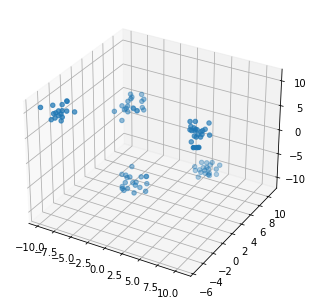

In [22]:
# Visualize Data
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['V1'],df['V2'],df['V3']);

### KMeans und Elbow-Method anwenden

In [15]:
# Calculate the distances to the nearest clusters centre
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

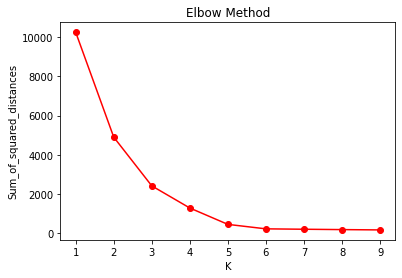

In [24]:
# Plot the elbow method
plt.plot(K, Sum_of_squared_distances, 'or-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

#### a) Bei k>5 sind keine weiteren Verbesserungen mehr zu sehen. 

In [13]:
# K=5 setzen und KMeans ausführen
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(df)
labels = kmeans.predict(df)
C = kmeans.cluster_centers_

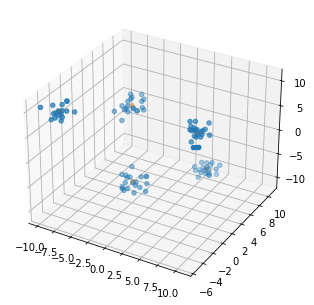

In [25]:
# Darstellen der Datenpunkte mit Centroiden
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['V1'],df['V2'],df['V3']);
ax.scatter(C[:, 0],C[:, 1],C[:, 2], 'or');

#### b) Clustering Vector

In [29]:
labels

array([0, 3, 3, 2, 3, 1, 2, 3, 4, 2, 3, 4, 2, 1, 0, 3, 4, 1, 0, 0, 3, 4,
       0, 3, 3, 2, 4, 4, 4, 1, 4, 4, 1, 1, 3, 0, 1, 0, 4, 3, 1, 1, 1, 0,
       1, 3, 2, 2, 1, 2, 2, 1, 4, 4, 2, 2, 0, 2, 3, 1, 2, 0, 2, 2, 1, 2,
       0, 0, 0, 1, 1, 2, 4, 2, 2, 4, 3, 1, 2, 4, 4, 1, 3, 0, 0, 3, 0, 0,
       0, 2, 4, 4, 4, 3, 2, 2, 4, 1, 0, 0])